In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'C:/Users/user/Desktop/Bellabeat_Data/weightLogInfo_reformatted.csv'

df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())

           Id                 Date    WeightKg  WeightPounds   Fat        BMI  \
0  1503960366  05-02-2016 23:59:59   52.599998    115.963147  22.0  22.650000   
1  1503960366  05-03-2016 23:59:59   52.599998    115.963147   NaN  22.650000   
2  1927972279  04-13-2016 01:08:52  133.500000    294.317120   NaN  47.540001   
3  2873212765  04-21-2016 23:59:59   56.700001    125.002104   NaN  21.450001   
4  2873212765  05-12-2016 23:59:59   57.299999    126.324875   NaN  21.690001   

   IsManualReport          LogId  
0            True  1462233599000  
1            True  1462319999000  
2           False  1460509732000  
3            True  1461283199000  
4            True  1463097599000  


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB
None


In [4]:
# Convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Convert to display the dates in 'm/d/y H:M:S' format
df['Date'] = df['Date'].dt.strftime('%m/%d/%Y %H:%M:%S')

# Convert 'Date' to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Generate summary statistics
summary_statistics = df.describe(include='all')

# To view the summary statistics
print(summary_statistics)

                  Id                 Date    WeightKg  WeightPounds       Fat  \
count   6.700000e+01                   67   67.000000     67.000000   2.00000   
unique           NaN                   56         NaN           NaN       NaN   
top              NaN  2016-05-02 23:59:59         NaN           NaN       NaN   
freq             NaN                    3         NaN           NaN       NaN   
first            NaN  2016-04-12 06:47:11         NaN           NaN       NaN   
last             NaN  2016-05-12 23:59:59         NaN           NaN       NaN   
mean    7.009282e+09                  NaN   72.035821    158.811801  23.50000   
std     1.950322e+09                  NaN   13.923206     30.695415   2.12132   
min     1.503960e+09                  NaN   52.599998    115.963147  22.00000   
25%     6.962181e+09                  NaN   61.400002    135.363832  22.75000   
50%     6.962181e+09                  NaN   62.500000    137.788914  23.50000   
75%     8.877689e+09        

C:\Users\user\AppData\Local\Temp\ipykernel_34488\3770515964.py:11: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_statistics = df.describe(include='all')


In [5]:
# Sort the DataFrame by 'Id' and then by 'Date', both in ascending order
df = df.sort_values(by=['Id', 'Date'])

# Reset the index of the sorted DataFrame
df = df.reset_index(drop=True)

In [6]:
print(df.head())

           Id                Date    WeightKg  WeightPounds   Fat        BMI  \
0  1503960366 2016-05-02 23:59:59   52.599998    115.963147  22.0  22.650000   
1  1503960366 2016-05-03 23:59:59   52.599998    115.963147   NaN  22.650000   
2  1927972279 2016-04-13 01:08:52  133.500000    294.317120   NaN  47.540001   
3  2873212765 2016-04-21 23:59:59   56.700001    125.002104   NaN  21.450001   
4  2873212765 2016-05-12 23:59:59   57.299999    126.324875   NaN  21.690001   

   IsManualReport          LogId  
0            True  1462233599000  
1            True  1462319999000  
2           False  1460509732000  
3            True  1461283199000  
4            True  1463097599000  


In [7]:
# Find unique values in the 'Id' column
unique_ids = df['Id'].unique()

# Count of unique values
num_unique_ids = len(unique_ids)

# Print the number of unique values
print(f"Number of unique IDs: {num_unique_ids}")

# Print each unique value
print("Unique IDs:")
for id in unique_ids:
    print(id)

Number of unique IDs: 8
Unique IDs:
1503960366
1927972279
2873212765
4319703577
4558609924
5577150313
6962181067
8877689391


In [8]:
# Group by 'Id' and count the number of rows for each Id
id_counts = df.groupby('Id').size()

# Print each unique Id and its count
print("Unique IDs and their Counts:")
print(id_counts)

Unique IDs and their Counts:
Id
1503960366     2
1927972279     1
2873212765     2
4319703577     2
4558609924     5
5577150313     1
6962181067    30
8877689391    24
dtype: int64


In [9]:
# Rename the 'Date' column to 'datetime'
df.rename(columns={'Date': 'datetime'}, inplace=True)

# Extract the date part from the 'datetime' column
df['date'] = df['datetime'].dt.date

# Group by the 'date' column and count the occurrences
date_counts = df.groupby('date').size()

# Print each unique date and its count
print("Unique Dates and their Counts:")
print(date_counts)

Unique Dates and their Counts:
date
2016-04-12    2
2016-04-13    3
2016-04-14    2
2016-04-15    1
2016-04-16    2
2016-04-17    3
2016-04-18    3
2016-04-19    2
2016-04-20    2
2016-04-21    3
2016-04-22    1
2016-04-23    2
2016-04-24    2
2016-04-25    3
2016-04-26    1
2016-04-27    2
2016-04-28    2
2016-04-29    2
2016-04-30    2
2016-05-01    3
2016-05-02    3
2016-05-03    3
2016-05-04    3
2016-05-05    1
2016-05-06    2
2016-05-07    1
2016-05-08    2
2016-05-09    3
2016-05-10    1
2016-05-11    2
2016-05-12    3
dtype: int64


In [10]:
# Filter the DataFrame where 'IsManualReport' is False
manual_report_false_df = df[df['IsManualReport'] == False]

# Print the number of rows where 'IsManualReport' is False
num_rows = len(manual_report_false_df)
print(f"Number of rows where 'IsManualReport' is False: {num_rows}")

# Print all rows where 'IsManualReport' is False
print("Rows where 'IsManualReport' is False:")
print(manual_report_false_df)

Number of rows where 'IsManualReport' is False: 26
Rows where 'IsManualReport' is False:
            Id            datetime    WeightKg  WeightPounds  Fat        BMI  \
2   1927972279 2016-04-13 01:08:52  133.500000    294.317120  NaN  47.540001   
12  5577150313 2016-04-17 09:17:55   90.699997    199.959265  NaN  28.000000   
43  8877689391 2016-04-12 06:47:11   85.800003    189.156628  NaN  25.680000   
44  8877689391 2016-04-13 06:55:00   84.900002    187.172464  NaN  25.410000   
45  8877689391 2016-04-14 06:48:43   84.500000    186.290612  NaN  25.309999   
46  8877689391 2016-04-16 13:39:25   85.500000    188.495234  NaN  25.590000   
47  8877689391 2016-04-18 06:51:14   85.800003    189.156628  NaN  25.680000   
48  8877689391 2016-04-19 06:39:31   85.300003    188.054316  NaN  25.530001   
49  8877689391 2016-04-20 06:44:54   84.900002    187.172464  NaN  25.410000   
50  8877689391 2016-04-21 06:50:27   84.500000    186.290612  NaN  25.290001   
51  8877689391 2016-04-23 07:22

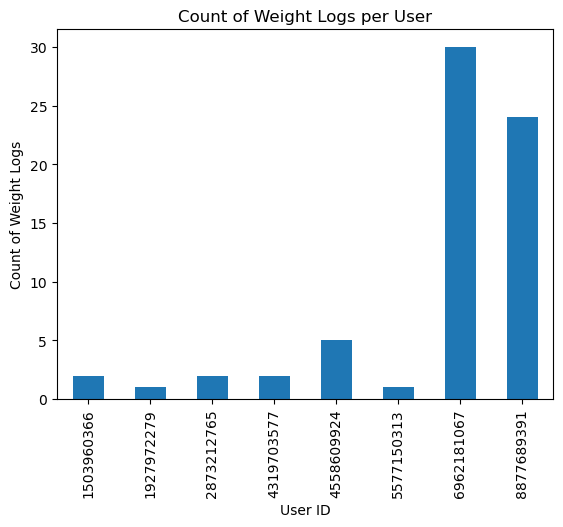

In [11]:
# Group by 'Id' and count the number of weight logs
weight_log_counts = df.groupby('Id').size()

# Plot
weight_log_counts.plot(kind='bar')
plt.xlabel('User ID')
plt.ylabel('Count of Weight Logs')
plt.title('Count of Weight Logs per User')
plt.show()